# Когортный анализ по удержанию и выручке.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt 

In [3]:
df = pd.read_excel('data/когортный анализ.xlsx')
df

,user_id,date,price
0,A0005,2020-03-25,50
1,A0005,2020-03-25,40
2,A0005,2020-03-26,70
3,A0005,2020-03-27,20
4,A0005,2020-03-29,50
...,...,...,...
704835,Z9247,2021-01-10,20
704836,Z9247,2021-01-11,50
704837,Z9247,2021-01-11,70
704838,Z9247,2021-01-11,20


In [28]:
df.isnull().sum()

user_id    0
date       0
price      0
dtype: int64

In [29]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)

In [30]:
df['monthYear'] = df['date'].apply(get_month)
df

,user_id,date,price,monthYear
0,A0005,2020-03-25,50,2020-03-01
1,A0005,2020-03-25,40,2020-03-01
2,A0005,2020-03-26,70,2020-03-01
3,A0005,2020-03-27,20,2020-03-01
4,A0005,2020-03-29,50,2020-03-01
...,...,...,...,...
704835,Z9247,2021-01-10,20,2021-01-01
704836,Z9247,2021-01-11,50,2021-01-01
704837,Z9247,2021-01-11,70,2021-01-01
704838,Z9247,2021-01-11,20,2021-01-01


In [32]:
df['cohortMonth'] = df.groupby('user_id')['monthYear'].transform('min')
df.head(50)

,user_id,date,price,monthYear,cohortMonth
0,A0005,2020-03-25,50,2020-03-01,2020-03-01
1,A0005,2020-03-25,40,2020-03-01,2020-03-01
2,A0005,2020-03-26,70,2020-03-01,2020-03-01
3,A0005,2020-03-27,20,2020-03-01,2020-03-01
4,A0005,2020-03-29,50,2020-03-01,2020-03-01
5,A0005,2020-03-31,50,2020-03-01,2020-03-01
6,A0005,2020-03-31,40,2020-03-01,2020-03-01
7,A0005,2020-04-01,100,2020-04-01,2020-03-01
8,A0005,2020-04-02,40,2020-04-01,2020-03-01
9,A0005,2020-04-04,70,2020-04-01,2020-03-01


In [33]:
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [91]:
date_year, date_month, _ = get_date(df, 'date')
cohort_year, cohort_month, _ = get_date(df, 'cohortMonth')
year_diff = date_year - cohort_year
month_diff = date_month - cohort_month
df['cohortIndex'] = year_diff*12 + month_diff+1
df.head()

,user_id,date,price,monthYear,cohortMonth,cohortIndex
0,A0005,2020-03-25,50,2020-03-01,2020-03-01,1
1,A0005,2020-03-25,40,2020-03-01,2020-03-01,1
2,A0005,2020-03-26,70,2020-03-01,2020-03-01,1
3,A0005,2020-03-27,20,2020-03-01,2020-03-01,1
4,A0005,2020-03-29,50,2020-03-01,2020-03-01,1


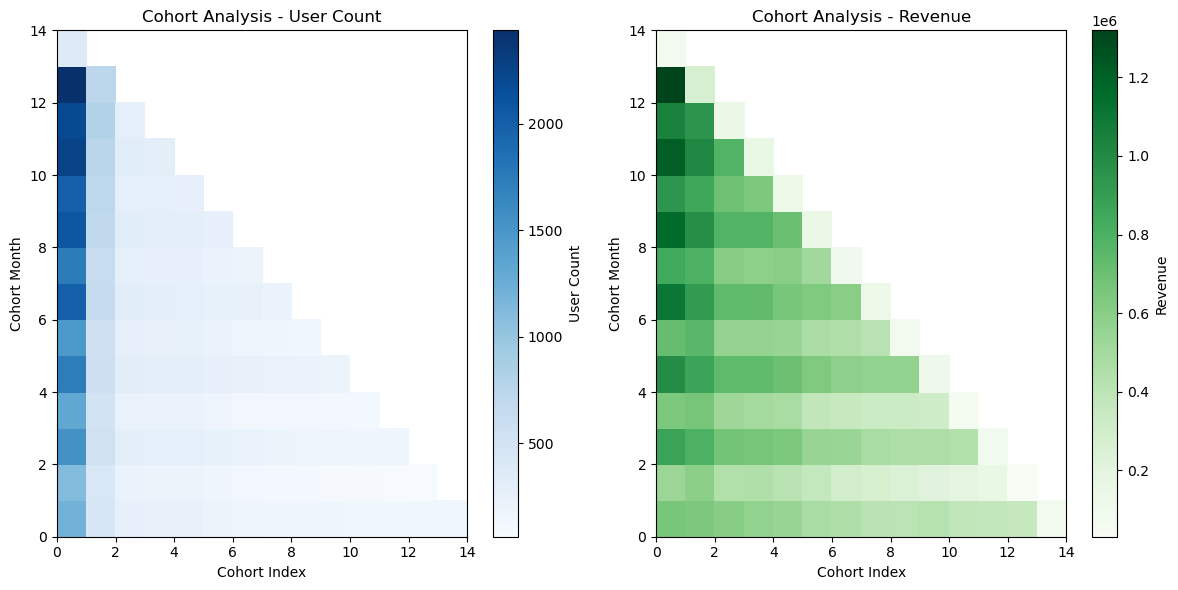

In [92]:
# Когортный анализ по количеству покупателей (user id)
cohort_users = data.groupby(['cohortMonth', 'cohortIndex'])['user_id'].nunique()
cohort_users = cohort_users.reset_index()
cohort_users_matrix = cohort_users.pivot(index='cohortMonth', columns='cohortIndex', values='user_id')

# Когортный анализ по суммам покупок
cohort_revenue = data.groupby(['cohortMonth', 'cohortIndex'])['price'].sum()
cohort_revenue = cohort_revenue.reset_index()
cohort_revenue_matrix = cohort_revenue.pivot(index='cohortMonth', columns='cohortIndex', values='price')

# Построение графиков
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Cohort Analysis - User Count")
plt.xlabel("Cohort Index")
plt.ylabel("Cohort Month")
plt.pcolor(cohort_users_matrix, cmap='Blues')
plt.colorbar(label="User Count")

plt.subplot(1, 2, 2)
plt.title("Cohort Analysis - Revenue")
plt.xlabel("Cohort Index")
plt.ylabel("Cohort Month")
plt.pcolor(cohort_revenue_matrix, cmap='Greens')
plt.colorbar(label="Revenue")

plt.tight_layout()
plt.show()

# Когортный анализ по удержанию.

In [100]:
cohort_retention_matrix = df.pivot_table(index='cohortMonth',
                      columns='cohortIndex',
                      values='user_id',
                      aggfunc=lambda x: len(x.unique()))
cohort_retention_matrix

cohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,1210.0,455.0,264.0,247.0,242.0,207.0,185.0,172.0,165.0,171.0,164.0,159.0,162.0,149.0
2020-02-01,1111.0,440.0,222.0,202.0,201.0,171.0,133.0,123.0,113.0,90.0,94.0,76.0,62.0,NaN
2020-03-01,1545.0,527.0,306.0,290.0,286.0,250.0,223.0,208.0,186.0,187.0,182.0,175.0,NaN,NaN
2020-04-01,1333.0,515.0,238.0,219.0,228.0,186.0,144.0,143.0,136.0,125.0,111.0,NaN,NaN,NaN
2020-05-01,1738.0,581.0,313.0,301.0,302.0,260.0,240.0,235.0,219.0,206.0,NaN,NaN,NaN,NaN
2020-06-01,1480.0,558.0,265.0,247.0,249.0,216.0,186.0,174.0,153.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,1995.0,649.0,332.0,312.0,293.0,256.0,243.0,224.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1744.0,643.0,285.0,265.0,263.0,227.0,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,2081.0,701.0,336.0,312.0,303.0,266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
first_column = cohort_retention_matrix.iloc[:,0]
retention_users = cohort_retention_matrix.div(first_column, axis=0)
retention_users.round(2)

cohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,1.0,0.38,0.22,0.20,0.20,0.17,0.15,0.14,0.14,0.14,0.14,0.13,0.13,0.12
2020-02-01,1.0,0.40,0.20,0.18,0.18,0.15,0.12,0.11,0.10,0.08,0.08,0.07,0.06,NaN
2020-03-01,1.0,0.34,0.20,0.19,0.19,0.16,0.14,0.13,0.12,0.12,0.12,0.11,NaN,NaN
2020-04-01,1.0,0.39,0.18,0.16,0.17,0.14,0.11,0.11,0.10,0.09,0.08,NaN,NaN,NaN
2020-05-01,1.0,0.33,0.18,0.17,0.17,0.15,0.14,0.14,0.13,0.12,NaN,NaN,NaN,NaN
2020-06-01,1.0,0.38,0.18,0.17,0.17,0.15,0.13,0.12,0.10,NaN,NaN,NaN,NaN,NaN
2020-07-01,1.0,0.33,0.17,0.16,0.15,0.13,0.12,0.11,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1.0,0.37,0.16,0.15,0.15,0.13,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1.0,0.34,0.16,0.15,0.15,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


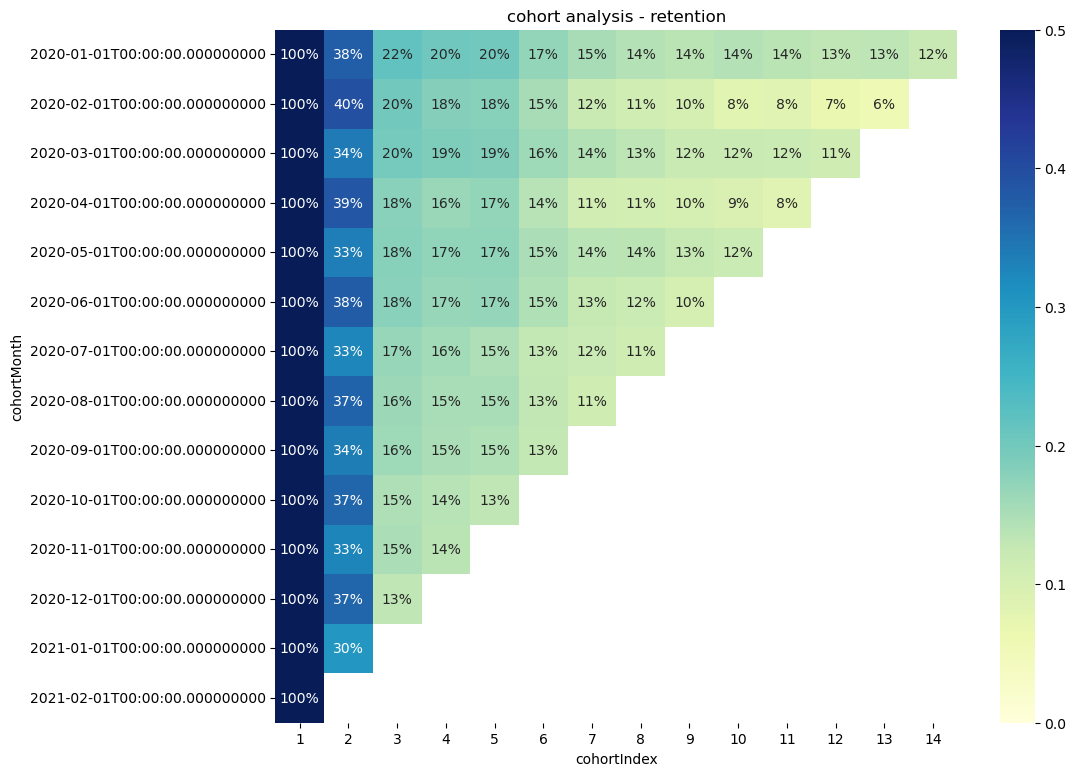

In [102]:
plt.figure(figsize=(11,9))
plt.title('cohort analysis - retention')
sns.heatmap(data=retention_users,
           annot=True,
           fmt='.0%',
           vmin=0.0,
           vmax=0.5,
           cmap="YlGnBu")
plt.show()

# Заключение по когортному анализу по удержанию.

1. Когорты расположены по строкам, а месяцы - по столбцам. Каждое значение в ячейке показывает retention для конкретной когорты и конкретного месяца.

2. Значения в матрице могут быть поняты как процент пользователей из начальной когорты, которые продолжают взаимодействовать с продуктом в каждый последующий месяц. Например, значение "0.38" в строке "2020-01-01" и столбце "2" означает, что во второй месяц с начала когорты осталось 38% пользователей.

3. Общий тренд, который можно наблюдать, - уменьшение retention с течением времени. Это означает, что с каждым последующим месяцем изначальное количество пользователей внутри когорты уменьшается. К четвертому месяцу остается не более 20%

4. Общая цель анализа retention - понять, как успешно удается удерживать пользователей с течением времени и в какие периоды происходит более интенсивное отток пользователей.

5. Когорты представлены в виде матриц, где значения показывают количество покупателей (user id) в каждой когорте для каждого месяца с момента начала когорты (cohort index).

6. В целом, графики позволяют оценить, какие когорты имеют лучшую и худшую возвращаемость (retention) пользователей. Те когорты, которые имеют более высокое количество пользователей через продолжительное время, могут считаться успешными, так как они удерживают пользователей более долго. (Например первая когорта января 2020)

7. Нечетные когорты имеют большую возвращаемость.

9. Когорты, начавшиеся позже (вторая половина 2020 года), имеют более низкие значения retention даже в начальные месяцы. Это может указывать на различия в поведении пользователей в зависимости от времени начала их взаимодействия с продуктом.

10. Для полного анализа стоит также рассмотреть другие параметры, такие как суммы покупок внутри когорт, а также провести более детальный анализ причин успешности или неудачи определенных когорт.

# Когортный анализ по выручке.

In [96]:
# Создание матрицы когортного анализа по суммам покупок (price)
cohort_revenue_matrix = df.pivot_table(index='cohortMonth',
                      columns='cohortIndex',
                      values='price',
                      aggfunc=sum)

cohort_revenue_matrix

cohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,662180.0,642990.0,608410.0,565650.0,547080.0,483840.0,455490.0,412040.0,407790.0,428040.0,382000.0,371740.0,360570.0,79310.0
2020-02-01,536310.0,594210.0,445590.0,450500.0,409640.0,366150.0,300350.0,278920.0,251840.0,212570.0,194800.0,156240.0,31080.0,NaN
2020-03-01,873000.0,797300.0,680220.0,666890.0,646610.0,546210.0,542030.0,486430.0,461720.0,465630.0,447040.0,90390.0,NaN,NaN
2020-04-01,648770.0,667480.0,526090.0,503450.0,482350.0,378620.0,354250.0,332740.0,329710.0,314460.0,61750.0,NaN,NaN,NaN
2020-05-01,992030.0,870090.0,737430.0,740850.0,699940.0,633220.0,584100.0,572410.0,568870.0,115380.0,NaN,NaN,NaN,NaN
2020-06-01,718980.0,759810.0,563430.0,559150.0,545300.0,472750.0,453890.0,411240.0,78310.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,1106840.0,913300.0,739440.0,735260.0,661290.0,634590.0,604380.0,124890.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,844520.0,800350.0,607090.0,586730.0,603010.0,517030.0,94600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1164460.0,979070.0,784700.0,778600.0,710410.0,140880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# Вычисление отношения сумм покупок в каждой когорте к начальной сумме во 2 месяце
first_column = cohort_revenue_matrix.iloc[:, 1]
purchase_sum = cohort_revenue_matrix.div(first_column, axis=0)
purchase_sum_rounded = purchase_sum.round(2)

purchase_sum_rounded

cohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,1.0,0.97,0.92,0.85,0.83,0.73,0.69,0.62,0.62,0.65,0.58,0.56,0.54,0.12
2020-02-01,1.0,1.11,0.83,0.84,0.76,0.68,0.56,0.52,0.47,0.40,0.36,0.29,0.06,NaN
2020-03-01,1.0,0.91,0.78,0.76,0.74,0.63,0.62,0.56,0.53,0.53,0.51,0.10,NaN,NaN
2020-04-01,1.0,1.03,0.81,0.78,0.74,0.58,0.55,0.51,0.51,0.48,0.10,NaN,NaN,NaN
2020-05-01,1.0,0.88,0.74,0.75,0.71,0.64,0.59,0.58,0.57,0.12,NaN,NaN,NaN,NaN
2020-06-01,1.0,1.06,0.78,0.78,0.76,0.66,0.63,0.57,0.11,NaN,NaN,NaN,NaN,NaN
2020-07-01,1.0,0.83,0.67,0.66,0.60,0.57,0.55,0.11,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1.0,0.95,0.72,0.69,0.71,0.61,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1.0,0.84,0.67,0.67,0.61,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


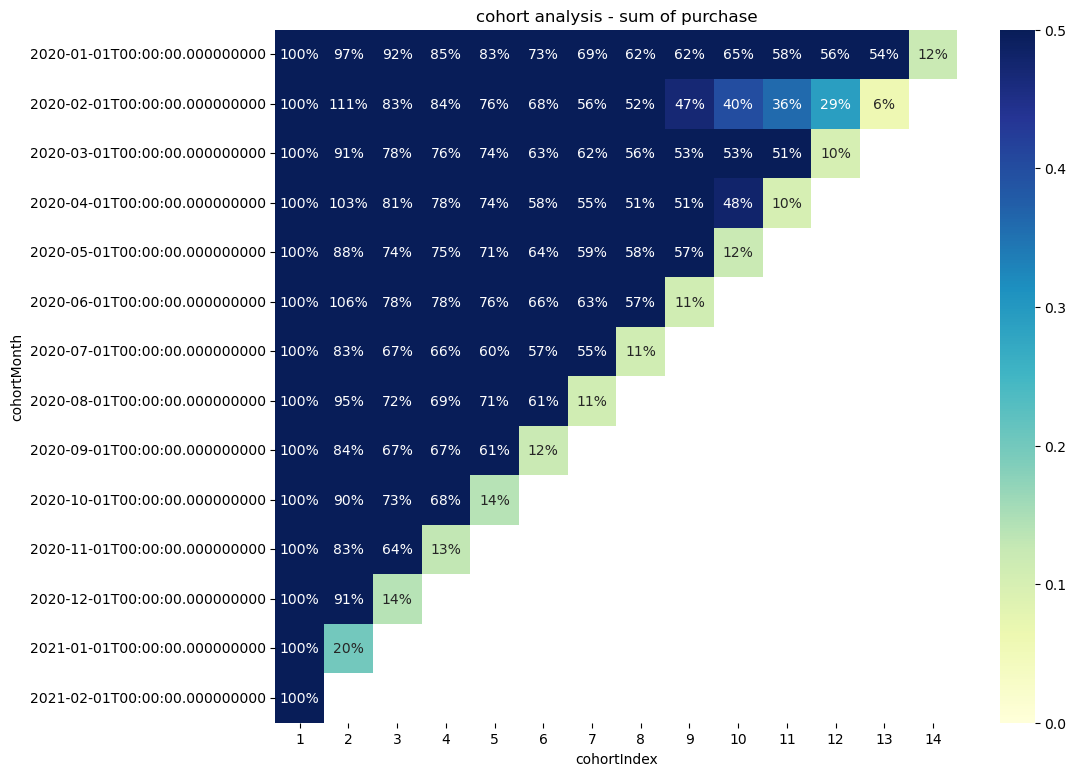

In [99]:
plt.figure(figsize=(11,9))
plt.title('cohort analysis - sum of purchase')
sns.heatmap(data=purchase_sum_rounded,
           annot=True,
           fmt='.0%',
           vmin=0.0,
           vmax=0.5,
           cmap="YlGnBu")
plt.show()

# Заключение по когортному анализу по выручке.

1. Когорты пользователей разделены по месяцам исходного взаимодействия (cohortMonth).

2. Каждая строка представляет когорту, начинающую в определенный месяц.

3. Каждый столбец (cohortIndex) представляет месяц с момента начала когорты. Таким образом, столбец "1" представляет первый месяц после начала когорты, столбец "2" - второй месяц и так далее.

4. Значения в матрице показывают отношение суммы покупок в каждой когорте к сумме покупок во втором месяце после начала когорты.

5. Например, значение 97% в строке "2020-01-01" и столбце "2" означает, что сумма покупок во втором месяце после начала когорты составляет 97% от суммы покупок в первом месяце для данной когорты.

6. Общий тренд, который можно заметить, - уменьшение суммы покупок с течением времени внутри каждой когорты.

7. Когорты, начавшиеся в начале 2020 года (январь, февраль, март), имеют более высокие значения в начальные месяцы и затем сумма покупок уменьшается.

8. Покупок на второй месяц у когорт февраля, апреля и июня 2020 больше, чем в первый месяц.

9. Уровень покупок у когорты февраля 2020 снижается быстрее, чем у остальных. Это происходит на 10й месяц от когортного месяца.

10. У когорт июля, сентября и ноября уровень покупок на второй месяц падает больше, чем у остальных когорт (на 16-17%).